# Homework #4
---
Student Name: Sam Crane

Student ID: 801101091

GitHub: https://github.com/samofuture/Intro-to-ML

In [3]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC, SVR
from sklearn.decomposition import PCA
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

# use seaborn plotting defaults
import seaborn as sns; sns.set()

# Problem 1

In [4]:
df = pd.read_csv('cancer.csv')
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
Y = df.iloc[:, 1].values
df = df.drop(columns='diagnosis', axis=1)
X = df.iloc[:, 1:].values

In [5]:
def plot_metrics(kernel_type, accuracies, precisions, recalls):
    fig, ax = plt.subplots()
    indices = np.linspace(0, 30, 30)
    ax.plot(indices, accuracies, label='Accuracy')
    ax.plot(indices, precisions, label='Precision')
    ax.plot(indices, recalls, label='Recall')

    ax.set_title(f'Metrics with Varying K for {kernel_type}')
    ax.set_xlabel('K')
    ax.set_ylabel('Value')
    ax.legend()
    plt.show()

In [6]:
def find_optimal_k(kernel_type, plot=False, c=1E3):
    k = 30
    max_accuracy = 0
    max_acc_index = 0
    accuracies = []
    precisions = []
    recalls = []
    reports = []
    cnf_matrices = []
    for n in tqdm(range(1, k+1)):
        pc_list = [f'pc{i}' for i in range(n)]
        pca = PCA(n_components=n)
        principalComponents = pca.fit_transform(X)
        principalDf = pd.DataFrame(data = principalComponents, columns = pc_list)
        
        X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, test_size=0.2, random_state=7)
        sc_X = StandardScaler()
        X_train = sc_X.fit_transform(X_train)
        X_test = sc_X.transform(X_test)
        
        model = SVC(kernel=kernel_type, C=c)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        
        cnf_matrix = confusion_matrix(Y_test, Y_pred)
        cnf_matrices.append(cnf_matrix)

        acc = metrics.accuracy_score(Y_test, Y_pred)
        precision = metrics.precision_score(Y_test, Y_pred)
        recall = metrics.recall_score(Y_test, Y_pred)
        accuracies.append(acc)
        precisions.append(precision)
        recalls.append(recall)
        if acc > max_accuracy:
            max_accuracy = acc
            max_acc_index = n
        reports.append(metrics.classification_report(Y_test, Y_pred))
    if plot:
        plot_metrics(kernel_type, accuracies, precisions, recalls)
        class_names=[0,1] # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrices[max_acc_index-1]), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        
    print('Optimum K:', max_acc_index)
    return reports, max_acc_index


100%|██████████| 30/30 [00:07<00:00,  4.25it/s]


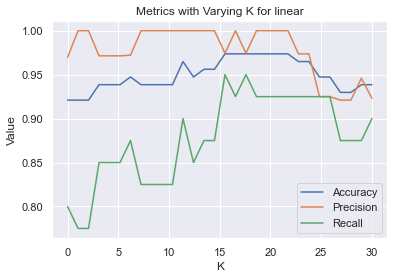

Optimum K: 16
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        74
           1       0.97      0.95      0.96        40

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



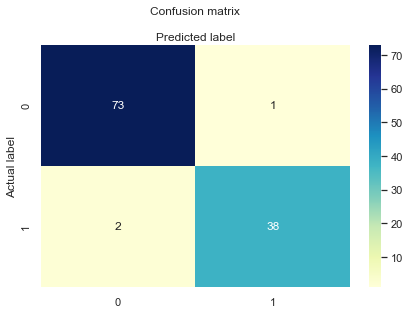

In [7]:
linear_metrics, linear_k = find_optimal_k('linear', True)
print(linear_metrics[linear_k-1])

100%|██████████| 30/30 [00:00<00:00, 47.27it/s]


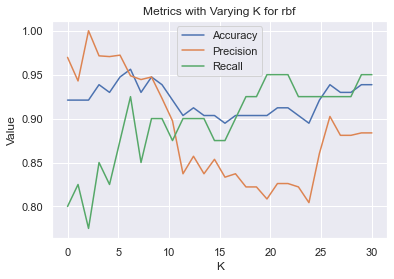

Optimum K: 7
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        74
           1       0.95      0.93      0.94        40

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



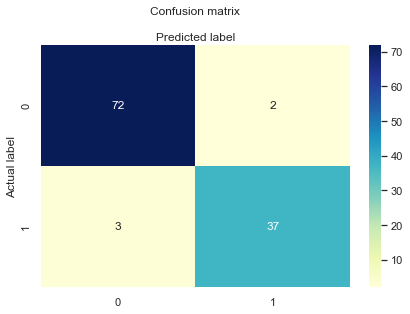

In [8]:
rbf_metrics, rbf_k = find_optimal_k('rbf', True)
print(rbf_metrics[rbf_k-1])

100%|██████████| 30/30 [00:00<00:00, 48.55it/s]


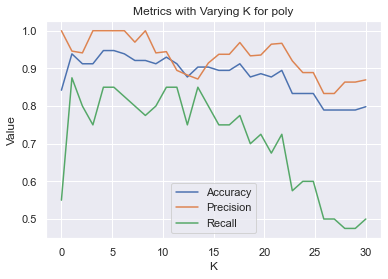

Optimum K: 5
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        74
           1       1.00      0.85      0.92        40

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



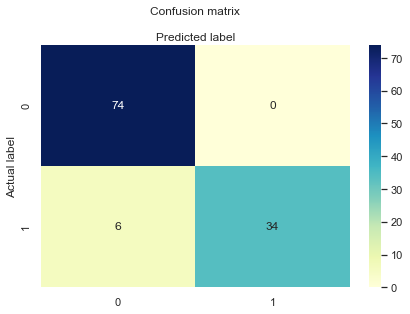

In [9]:
poly_metrics, poly_k = find_optimal_k('poly', True)
print(poly_metrics[poly_k])

### Kernelization Methods
- Linear
    - Accuracy: 0.97
- RBF
    - Accuracy: 0.96
- Poly
    - Accuracy: 0.95

Linear had the most constantly improving of the graphs, showing recall and precision increasing with accuracy remaining roughly the same throughout the number of principal components.
RBF had a much more chaotic graph, with precision and recall fluctuating, but accuracy remaining relatively stable.
Poly saw a negative trend in all of the metrics as K increased beyond 15.

### Comparison to HW3
These models overall performed worse than the ones from HW3, with more false negatives and postives in every case.

# Problem 2


In [17]:
def prep_data() -> pd.DataFrame:
    df = pd.read_csv("Housing.csv")

    df['mainroad'] = df['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
    df['guestroom'] = df['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
    df['basement'] = df['basement'].apply(lambda x: 1 if x == 'yes' else 0)
    df['hotwaterheating'] = df['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
    df['airconditioning'] = df['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
    df['prefarea'] = df['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)
    df['furnishingstatus'] = df['furnishingstatus'].apply(lambda x: 2 if x == 'furnished' else 0)

    return df

In [18]:
df = prep_data()
df.pop('furnishingstatus')
price = df.pop('price')
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,7420,4,2,3,1,0,0,0,1,2,1
1,8960,4,4,4,1,0,0,0,1,3,0
2,9960,3,2,2,1,0,1,0,0,2,1
3,7500,4,2,2,1,0,1,0,1,3,1
4,7420,4,1,2,1,1,1,0,1,2,0


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(df, price, test_size=0.2, random_state=15)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(X_train, Y_train).predict(X_test)

In [14]:
def plot_regression(test, predicted, title='SVR Predicted vs. Actual Values'):
    # Plot the predicted vs. actual values (for one dimension)
    plt.scatter(test, predicted)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.show()

MSE: 4015492219138.016


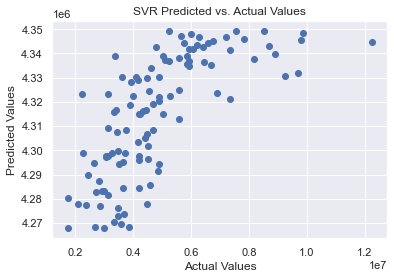

In [20]:
mse = mean_squared_error(Y_test, y_rbf)
print("MSE:", mse)

plot_regression(Y_test, y_rbf)

### Comparison to HW2
These results are similar compared to HW2 since most of these losses are close to the same scale I was seeing in that homework.

In [21]:
def svr_find_optimal_k(kernel_type, plot=True, c=1E8):
    k = 11
    optimum_k = 0
    min_mse = 999999999999999999999999999999999
    best_model = None
    mses = []
    for n in tqdm(range(1, k+1)):
        pc_list = [f'pc{i}' for i in range(n)]
        pca = PCA(n_components=n)
        principalComponents = pca.fit_transform(df)
        principalDf = pd.DataFrame(data = principalComponents, columns=pc_list)
        
        X_train, X_test, Y_train, Y_test = train_test_split(principalDf, price, test_size=0.2, random_state=15)
        sc_X = StandardScaler()
        X_train = sc_X.fit_transform(X_train)
        X_test = sc_X.transform(X_test)
        
        model = SVR(kernel=kernel_type, C=c)
        model = model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

        mse = mean_squared_error(Y_test, Y_pred)
        mses.append(mse)

        if mse < min_mse:
            min_mse = mse
            optimum_k = n
            best_model = model

    if plot:
        pc_list = [f'pc{i}' for i in range(optimum_k)]
        pca = PCA(n_components=optimum_k)
        principalComponents = pca.fit_transform(df)
        principalDf = pd.DataFrame(data = principalComponents, columns=pc_list)
        
        X_train, X_test, Y_train, Y_test = train_test_split(principalDf, price, test_size=0.2, random_state=15)
        sc_X = StandardScaler()
        X_train = sc_X.fit_transform(X_train)
        X_test = sc_X.transform(X_test)
        
        Y_pred = best_model.predict(X_test)
        plot_regression(Y_test, Y_pred, f'SVR {kernel_type} Predicted vs. Actual Values')
    print('Optimum K:', optimum_k)
    return optimum_k, mses


100%|██████████| 11/11 [00:01<00:00,  5.63it/s]


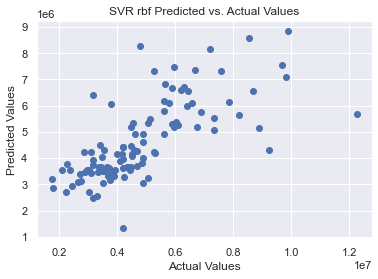

Optimum K: 3
1915029188078.0378


In [22]:
rbf_k, rbf_mses = svr_find_optimal_k('rbf', True)
print(rbf_mses[rbf_k-1])

100%|██████████| 11/11 [00:06<00:00,  1.78it/s]


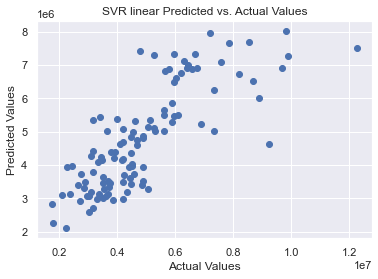

Optimum K: 9
1425679841102.2878


In [23]:
linear_k, linear_mses = svr_find_optimal_k('linear', True)
print(linear_mses[linear_k-1])

100%|██████████| 11/11 [00:57<00:00,  5.26s/it]


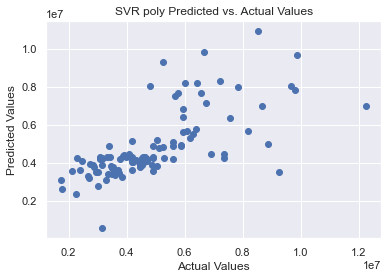

Optimum K: 5
2113719267576.6663


In [24]:
poly_k, poly_mses = svr_find_optimal_k('poly', True)
print(poly_mses[poly_k-1])

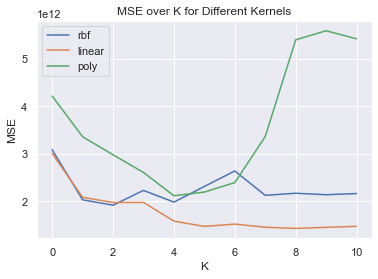

In [26]:
fig, ax = plt.subplots()

ax.plot(rbf_mses, label='rbf')
ax.plot(linear_mses, label='linear')
ax.plot(poly_mses, label='poly')

ax.set_title('MSE over K for Different Kernels')
ax.set_xlabel('K')
ax.set_ylabel('MSE')
ax.legend()

plt.show()

In [27]:
rbf_mse = rbf_mses[rbf_k-1]
linear_mse = linear_mses[linear_k-1]
poly_mse = poly_mses[poly_k-1]

if rbf_mse < linear_mse and rbf_mse < poly_mse:
    print("RBF Lowest")
elif linear_mse < rbf_mse and linear_mse < poly_mse:
    print("Linear Lowest")
else:
    print("Poly Lowest")

Linear Lowest


### Kernelization
Using the MSE to determine how accurate a model is, we can determine that the Linear model performed the best. The closer to a line (with a slope of 1) the points in the graphs are, the more accurate that model was. The MSE seemed to go steadily downward for linear as K grew, while it seemed to stabilize for rbf, and grow for poly.